<a href="https://colab.research.google.com/github/mxtqnt/Grafos/blob/main/TrabalhoGrafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np

# Função para gerar um grafo simples e conexo

In [88]:
# Função para gerar um grafo simples e conexo
def gerar_grafo_conexo(n, matriz_custo):
    matriz_adjacencia = matriz_custo.copy()
    G = nx.Graph()
    G.add_nodes_from(range(n))

    # Criar uma árvore básica para garantir que o grafo seja conexo
    for i in range(n - 1):
        G.add_edge(i, i + 1) #aquiiiiiis

    # Adicionar arestas extras para tornar o grafo mais interessante
    num_arestas_extras = random.randint(n, 2 * n)
    while num_arestas_extras > 0:
        u, v = random.sample(range(n), 2)
        if not G.has_edge(u, v):
            numero_aleatorio = random.randint(1,5)
            matriz_custo[u, v] = numero_aleatorio
            matriz_adjacencia[u, v] = 1
            G.add_edge(u, v, weight = numero_aleatorio)
            num_arestas_extras -= 1

    return G, matriz_custo , matriz_adjacencia

# Função para desenhar o grafo

In [89]:
# Função para desenhar o grafo
def desenhar_grafo(G, n):

    plt.figure(figsize=(15, 15))
    pos = nx.spring_layout(G, 20)  # Layout do grafo
    # nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_color='black', edge_color='gray')

    # edges
    nx.draw_networkx_edges(G, pos, edge_color="#c1121f", width=2)
    # nx.draw_networkx_edges(
    #     G, pos, width=6, alpha=0.5, edge_color="b", style="solid"
    # )

    #node
    nx.draw_networkx_nodes(G, pos, node_color="#780000", node_size=350)

    # node labels
    nx.draw_networkx_labels(G, pos, font_color="white", font_family="sans-serif")

    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_color="#780000", font_family="sans-serif")
    plt.title(f'Grafo Conexo com {n} nós')
    plt.show()

# Gerando grafos simples e conexos com 10, 50 e 100 nós

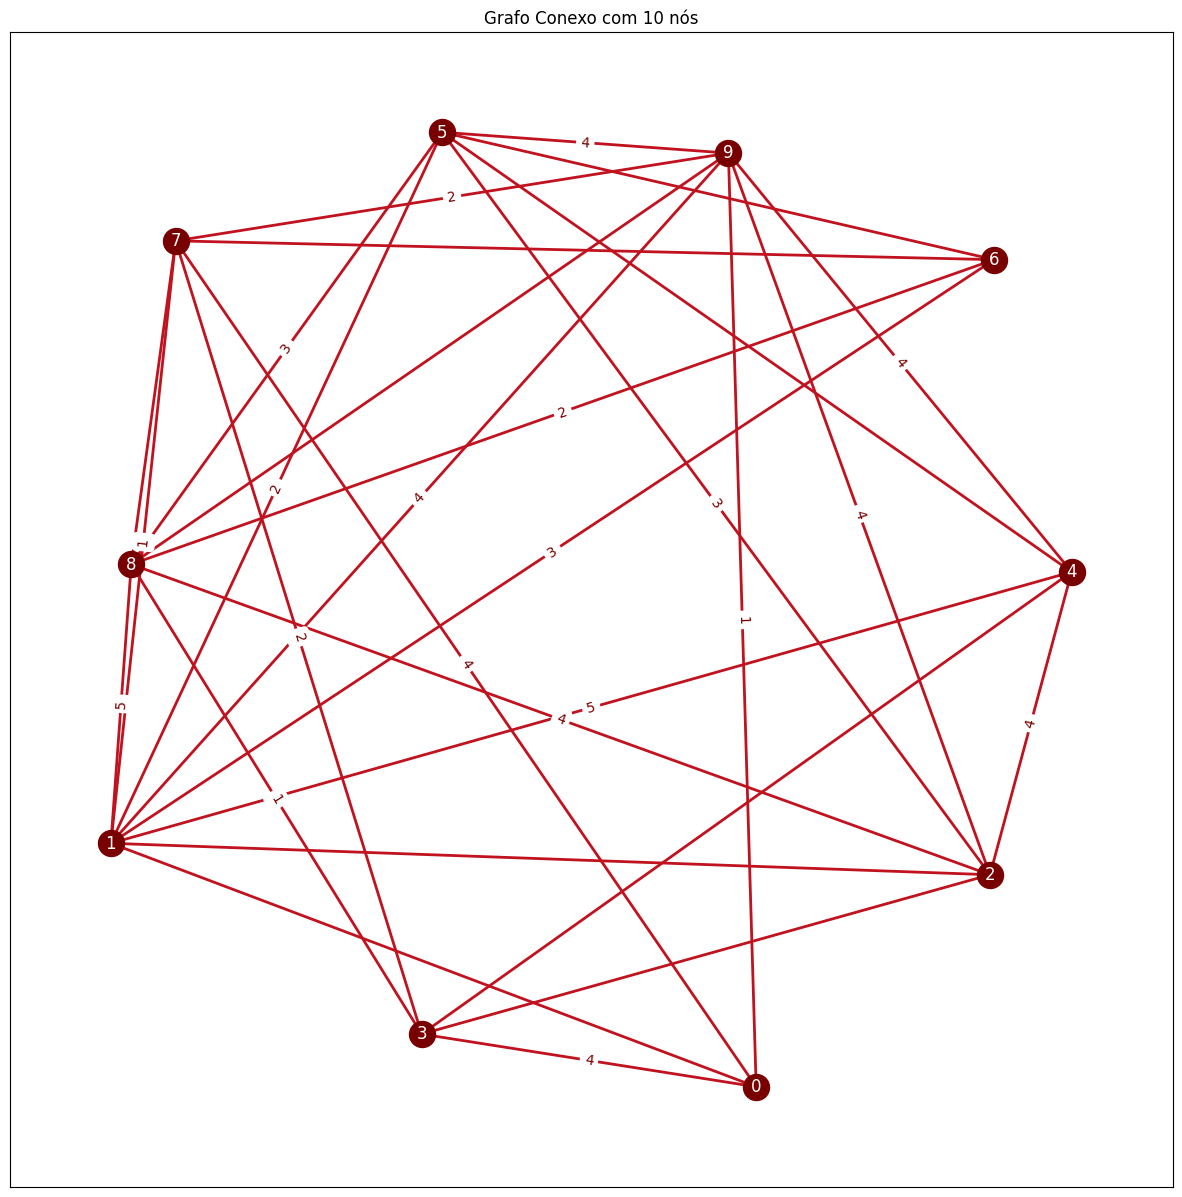

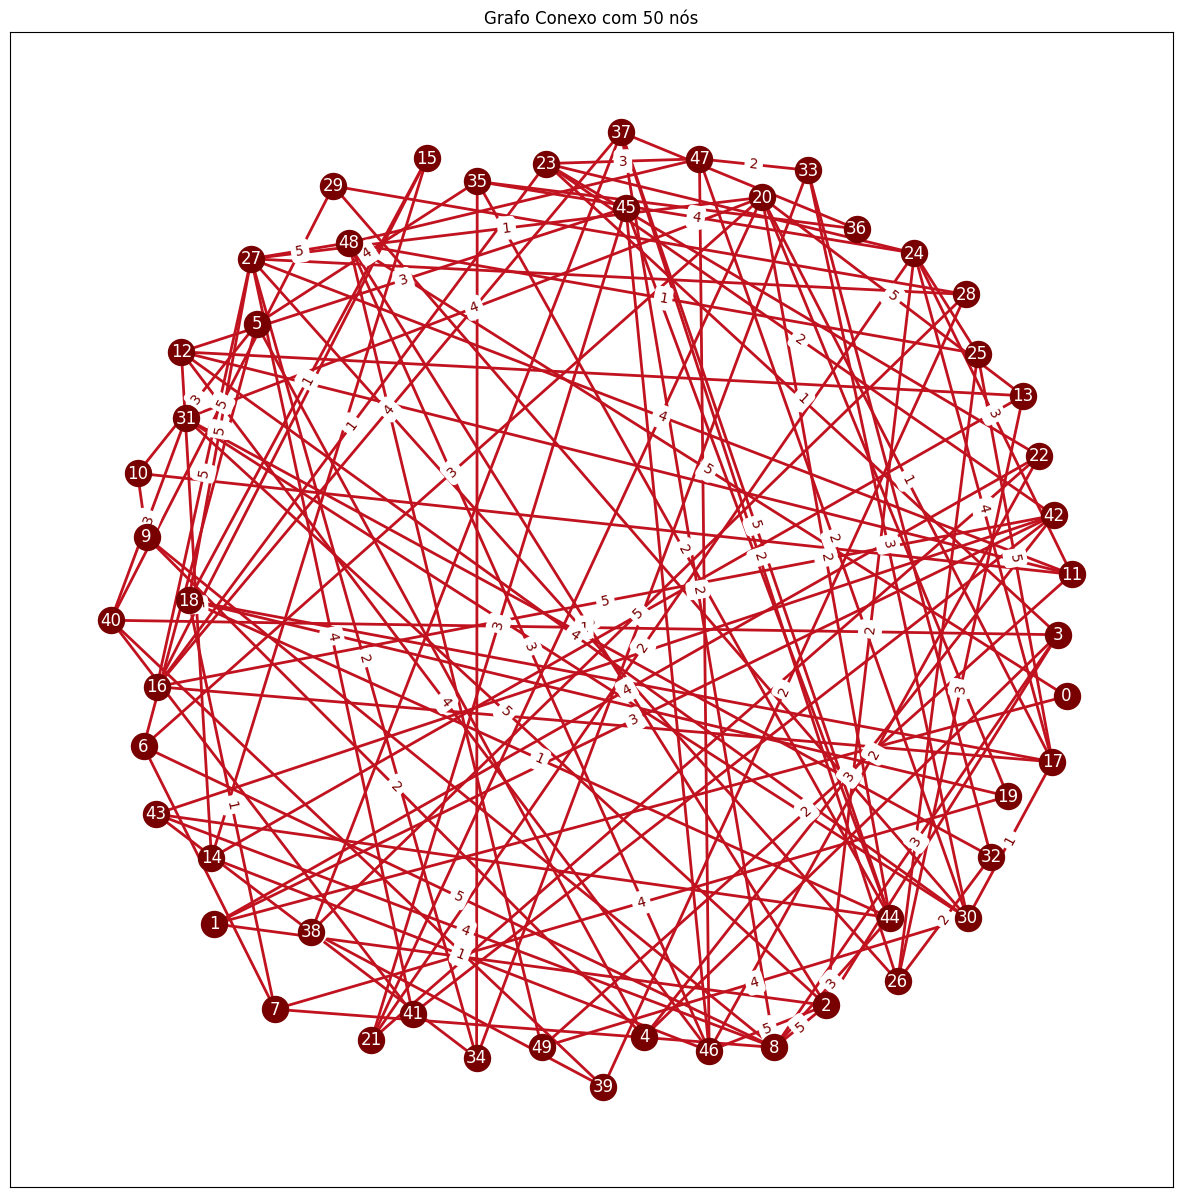

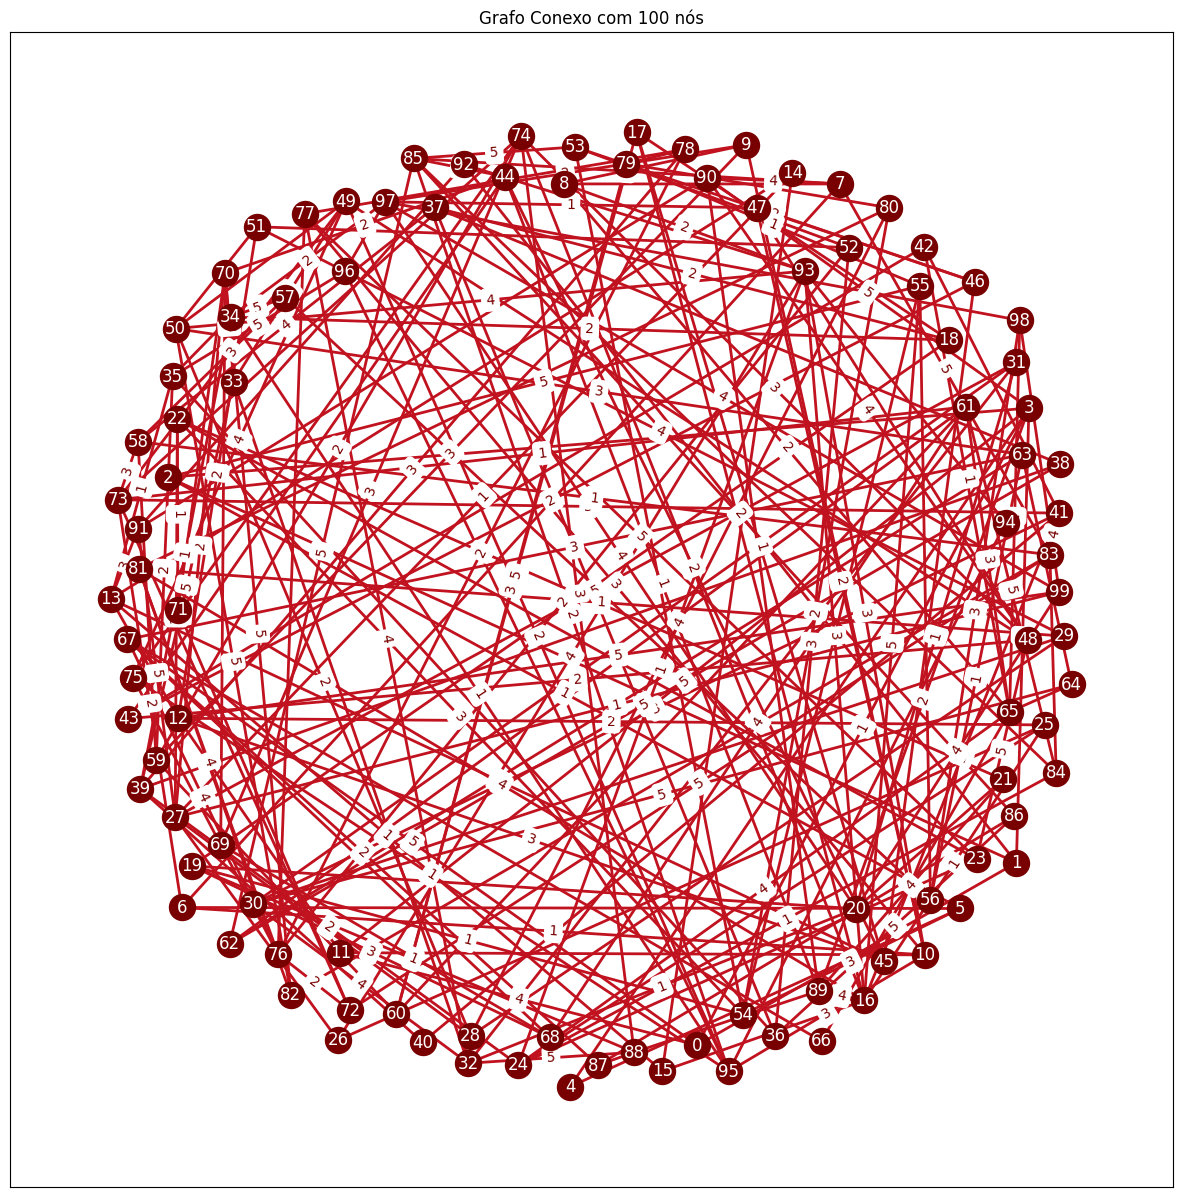

In [94]:
matrizes_custo = [None] * 3
matrizes_adjacencia = matrizes_custo.copy()

# Gerar e desenhar grafos com n = 10, 50, 100
for pos,n in enumerate([10, 50, 100]):
    matriz_vazia = np.zeros((n, n))
    G,matrizes_custo[pos],matrizes_adjacencia[pos] = gerar_grafo_conexo(n, matriz_vazia)

    desenhar_grafo(G, n)

# Artigo


---

link para o artigo: https://www.researchgate.net/profile/Putri-Indah-Pramesti/publication/381519447_Application_of_Graph_Theory_to_Computer_Networks_Using_the_Kruskal_Algorithm/data/66726682a54c5f0b946e2804/Application-of-Graph-Theory-to-Computer-Networks-Using-the-Kruskal-Algorithm.pdf


---

pergunta do trabalho?

Como a teoria dos grafos pode ser aplicada no contexto de redes da computação

---


Porque?

A teoria dos grafos permite a construção de modelos de relacionamento entre os computadores na rede para uma melhor analise de performasse e segurança

---

Como?

Uso de algorítimos para achar o menor caminho, como Dijkstra, e saber como a estrutura do grafo é relevante para entender pontos vulnerareis e posáveis ataques a rede

---

proposta do artigo?

mostrar uma aplicação do Kruskal para mostrar o s benefícios dele na gerencia e eficiencia da rede

---

resultados:

para as analise foi usado um datasert com informações sobre uma topologia de rede, incluindo os nos (computadores) e as conexões


também foi feito um calculo de performasse ficando como mostra nas tabelas

*TABELA DE TEMPO DE EXECUÇÃO*


|algorítimo | tempo |
|-----------|-------|
|kruskal    | 5.7 ms|
|prim       | 3.2 ms|


*USO DE MEMORIA*


|algorítimo | tempo |
|-----------|-------|
|kruskal    | 12 MB |
|prim       | 8 MB  |

A eferência do algorítimo é influenciada pela topologia da rede

Sendo assim, o algorítimo Kruskal deve um bom desempenho com uma complexidade O(E log V), onde E é o numero de arestas e V de vértices


OBS: olhar a parte de resultados do artigo para um melhor entendimento da geração da arvore minima

In [ ]:


# precisa arrumar uma forma de gerar arestas aleatoriamente
# há uma forma de descobrir o número máximo de vértices que um grafo pode ter?
# Se sim, podemos usar esse número para um loop
# Nesse loop, iremos escolher aleatoriamente os nós criados para criar os vértices


def gerar_grafo_conexo(n, matriz_adjacencia):
    G = nx.Graph()
    G.add_nodes_from(range(n))

    # Criar uma árvore básica para garantir que o grafo seja conexo
    for i in range(n - 1):
        G.add_edge(i, i + 1) #aquiiiiiis

    # Adicionar arestas extras para tornar o grafo mais interessante
    num_arestas_extras = random.randint(n, 2 * n)
    while num_arestas_extras > 0:
        u, v = random.sample(range(n), 2)
        if not G.has_edge(u, v):
            numero_aleatorio = random.randint(50, 10000)
            matriz_adjacencia[u, v] = numero_aleatorio
            G.add_edge("c", "f", weight= random.randint(0,10))
            num_arestas_extras -= 1

    print(matriz_adjacencia)
    return G


for n in [10, 50, 100]:
    matriz_vazia = np.zeros((n, n))
    G = gerar_grafo_conexo(n, matriz_vazia)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

[[   0.    0. 5858.    0.    0.    0.    0.    0.    0. 9197.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0. 8887.]
 [   0.    0.    0.    0.    0. 4173.    0.    0.    0.    0.]
 [   0. 8933.    0.    0.    0.    0.    0. 1473. 1973. 1035.]
 [   0.    0. 3128.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0. 5928.]
 [9955.    0.    0.    0.    0.    0. 1152.    0.    0.    0.]
 [4584.    0.    0.    0.    0.    0.    0.    0.    0.    0.]]
[[   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0. 1336.    0.]
 ...
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]
[[   0.    0.    0. ... 3535.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0.

KeyError: 'weight'